# check consistency of PSDs

At first glance, there seems to be a lot of inconsistency with how the PSDs look.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16, 10)
%matplotlib inline

In [2]:
subj = np.load('../../../data/runs/2017-03-11/raw_output/sensor-level/match-oa-trials/subj-2-24-ransac.npy').item()

ImportError: No module named 'pandas.indexes'

In [3]:
def get_avg_psd(subj, i, task='eyesc'):
    avg_psd = np.mean([subj[i].psds[ch][task] for ch in range(subj[i].nbchan - 5)], axis=0)
    return avg_psd

# Let's get a broad overview:

In [ ]:
plt.figure(figsize=(16,10))
for i in range(subj['nbsubj']):
    if i % 5 == 0:
        plt.figure(figsize=(16,10))
    plt.plot(subj[0].f, np.log10(get_avg_psd(subj, i)), label=subj[i].name)
    plt.legend()
    plt.xlim([0, 45])
    plt.ylim([-3, 3])
    
# plt.legend()
# plt.xlim([0, 45])

In [ ]:
def get_subj_number(subj, subject_name):
    for i in range(subj['nbsubj']):
        if subj[i].name == subject_name:
            return i

In [ ]:
get_subj_number(subj, '1121181183')

# Bad PSDs
- 112118266
- 112118373
- 112118479 (really fucked beta, gamma)
- 112118578
- 112118785 (not that bad, but alpha oscillation looks a little weird)
- 120127121 (basically no alpha, which is strange)
- 120127132 (no alpha and broadband increase)
- 120127138 (massive gamma increase)
- 120127140 (alpha is strangely low in frequency)
- 120127149 (broad alpha-beta increase)
- 120127167 (theta trough is fairly high, alpha-beta increase)
- 120127170 (no alpha, positive gamma)

In [ ]:
def plot_all_ch_psds(subj, idx, task='eyesc'):
    plt.figure(figsize=(16,10))
    for ch in range(subj[idx].nbchan):
        plt.plot(subj[0].f, np.log10(subj[idx].psds[ch][task]))
    plt.title(task); plt.legend()
    plt.xlim([0, 45])

def plot_eyesc_eyeso_avg(subj, idx):
    plt.figure(figsize=(16,10))
    plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx, 'eyesc')), label='eyesc')
    plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx, 'eyeso')), label='eyeso')
    plt.xlim([0, 45])
    plt.ylim([-3, 3])

## 112118266

In [ ]:
idx = get_subj_number(subj, '112118266')
plot_all_ch_psds(subj, idx)

(-3, 3)

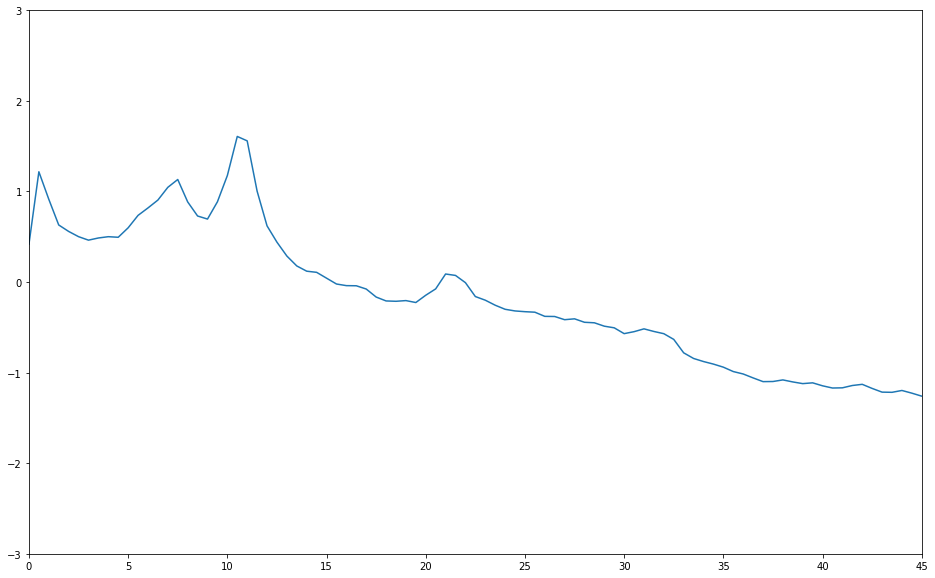

In [23]:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx)))
plt.xlim([0, 45])
plt.ylim([-3, 3])

(-3, 3)

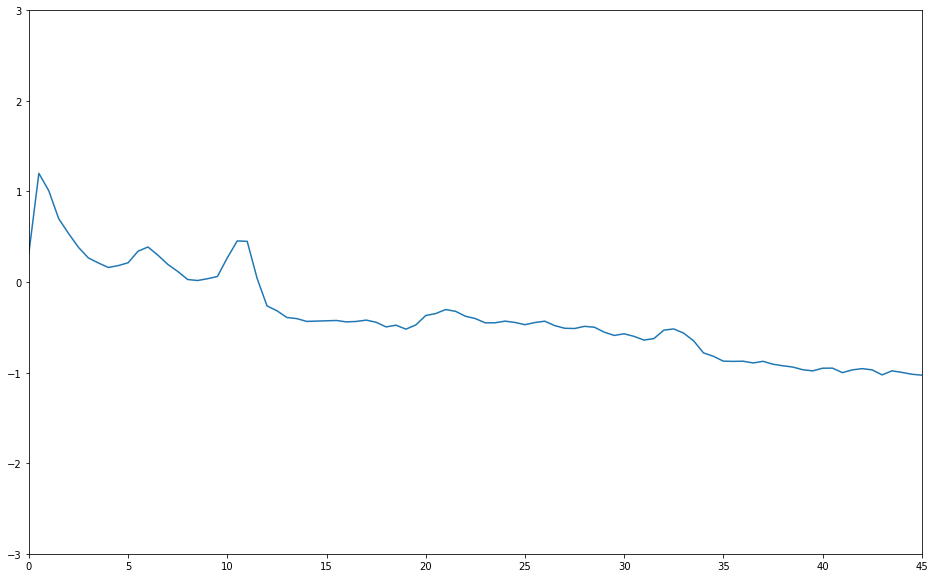

In [24]:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx, 'eyeso')))
plt.xlim([0, 45])
plt.ylim([-3, 3])

(0, 45)

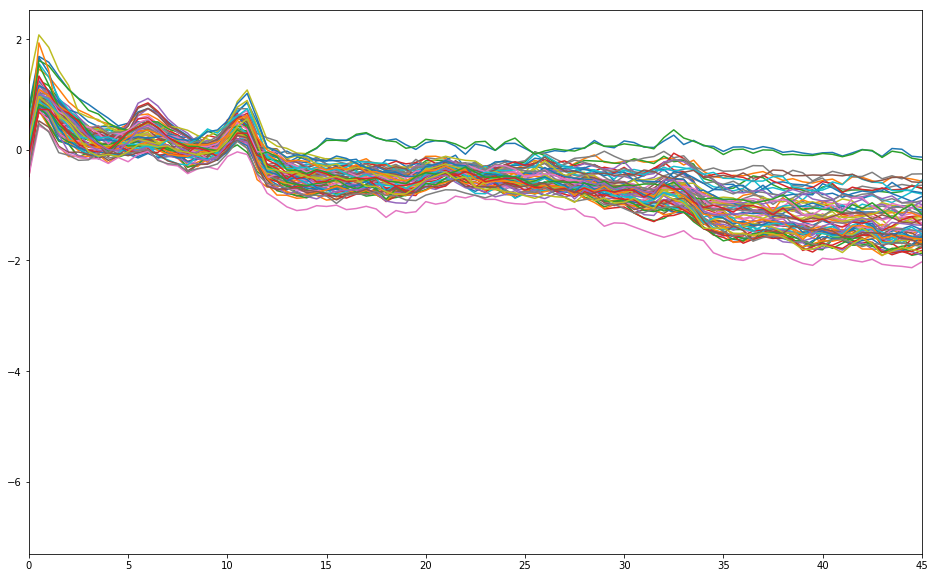

In [26]:
plt.figure(figsize=(16,10))
name = '112118266'
idx = get_subj_number(subj, name)
for ch in range(subj[idx].nbchan):
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyeso']))
plt.xlim([0, 45])
# plt.ylim([-1, 20])

## 112118373

(0, 45)

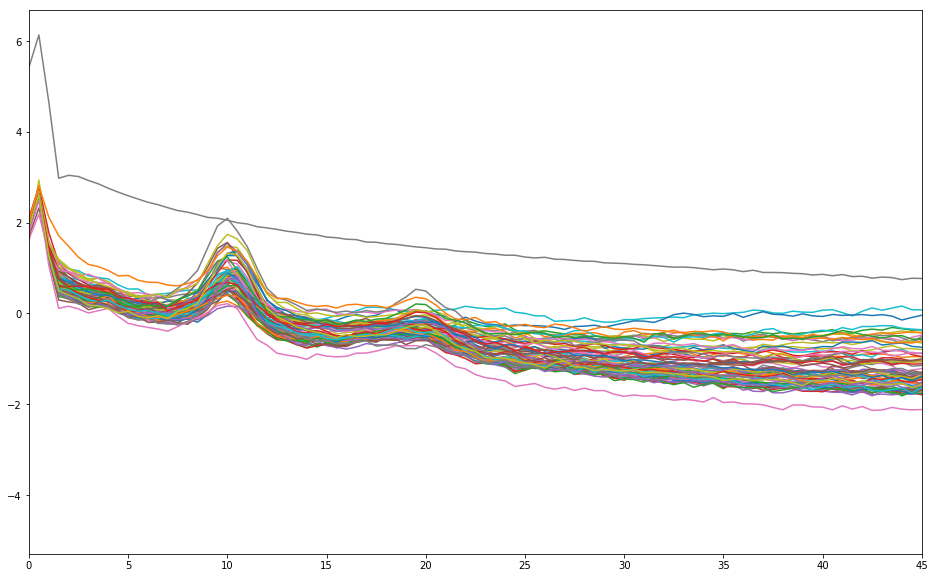

In [27]:
plt.figure(figsize=(16,10))
name = '112118373'
idx = get_subj_number(subj, name)
for ch in range(subj[idx].nbchan):
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyesc']))
plt.xlim([0, 45])
# plt.ylim([-1, 20])

(0, 45)

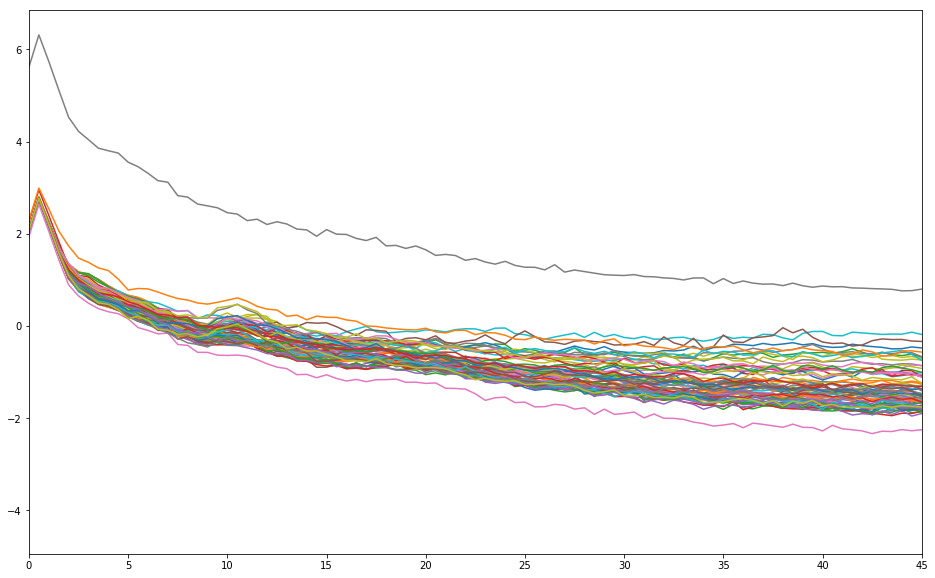

In [28]:
plt.figure(figsize=(16,10))
name = '112118373'
idx = get_subj_number(subj, name)
for ch in range(subj[idx].nbchan):
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyeso']))
plt.xlim([0, 45])
# plt.ylim([-1, 20])

(-3, 3)

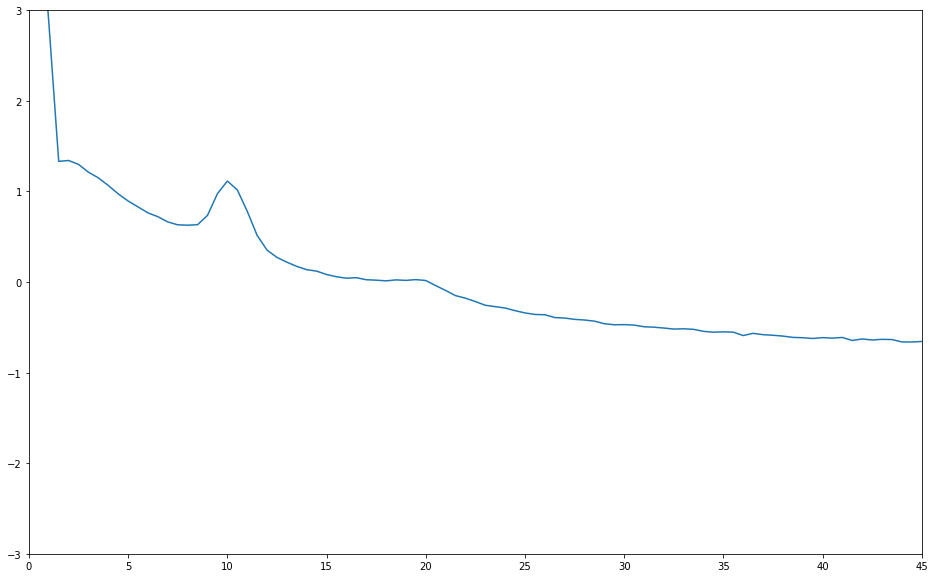

In [29]:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx)))
plt.xlim([0, 45])
plt.ylim([-3, 3])

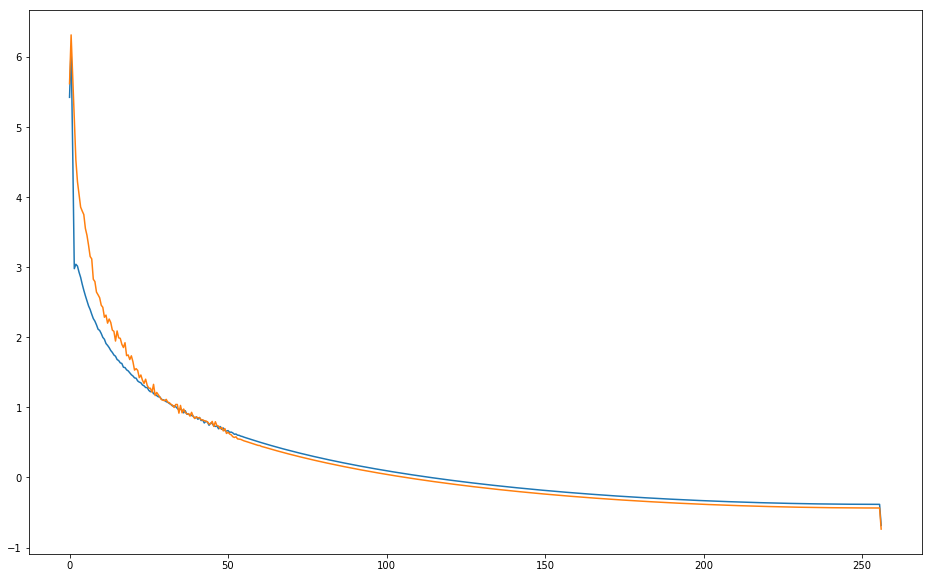

In [37]:
# Looks like it's 47:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(subj[idx].psds[47]['eyesc']))
plt.plot(subj[0].f, np.log10(subj[idx].psds[47]['eyeso']))

## 112118479 (really fucked beta, gamma)

(0, 45)

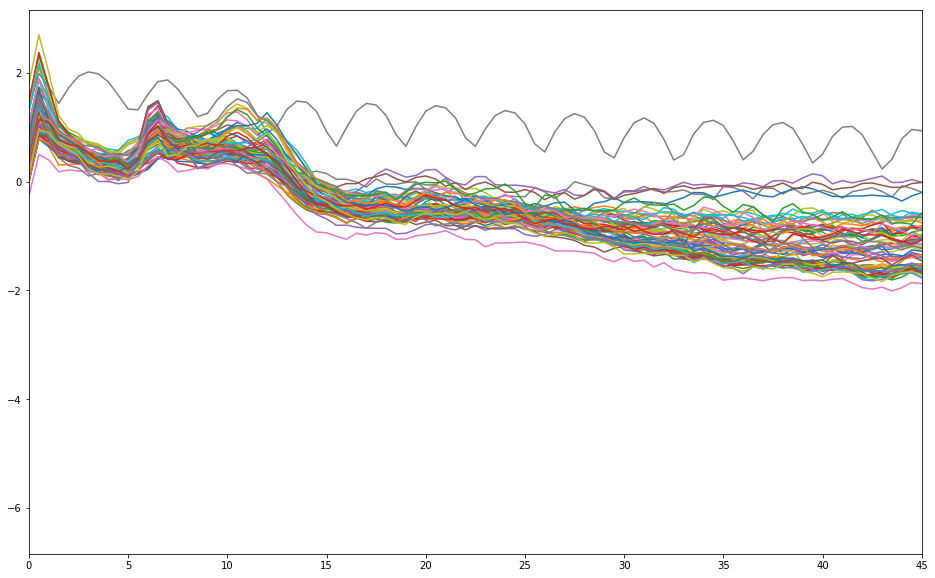

In [40]:
plt.figure(figsize=(16,10))
name = '112118479'
idx = get_subj_number(subj, name)
for ch in range(subj[idx].nbchan):
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyesc']))
plt.xlim([0, 45])
# plt.ylim([-1, 20])

(0, 45)

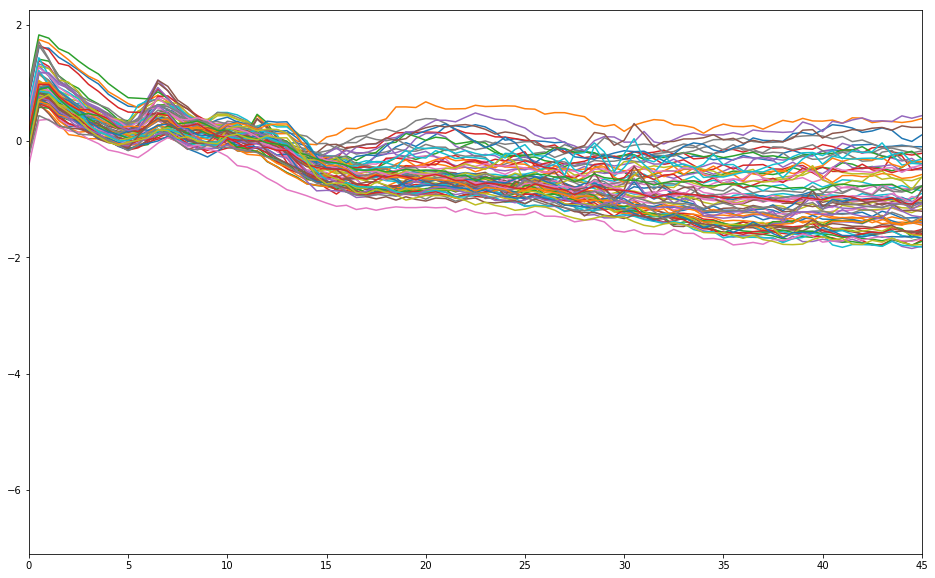

In [41]:
plt.figure(figsize=(16,10))
name = '112118479'
idx = get_subj_number(subj, name)
for ch in range(subj[idx].nbchan):
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyeso']))
plt.xlim([0, 45])
# plt.ylim([-1, 20])

(-3, 3)

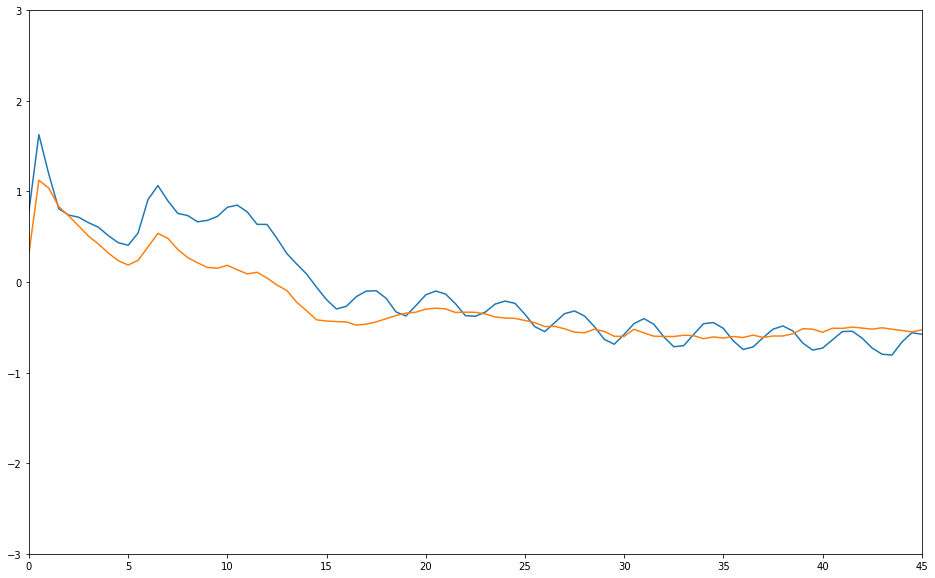

In [43]:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx)))
plt.plot(subj[0].f, np.log10(get_avg_psd(subj, idx, 'eyeso')))
plt.xlim([0, 45])
plt.ylim([-3, 3])

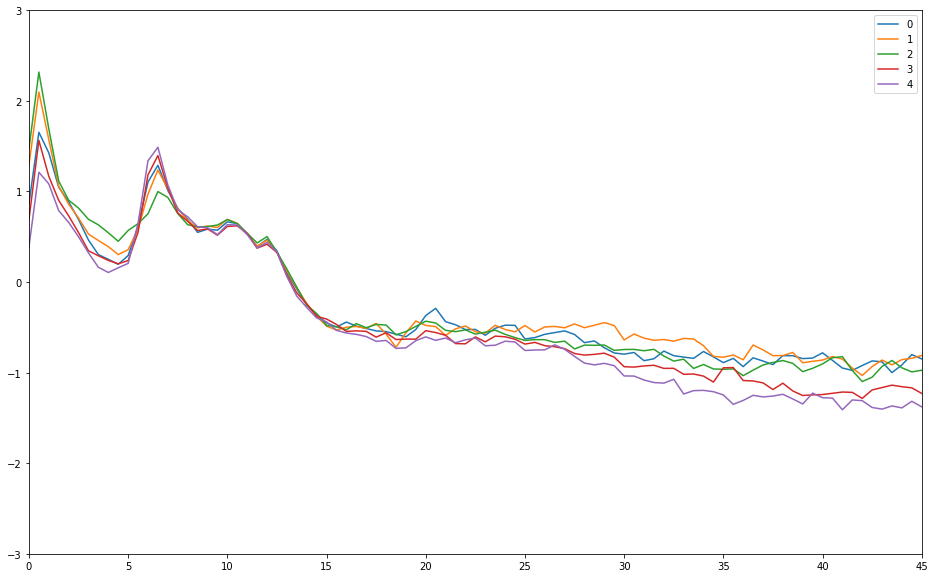

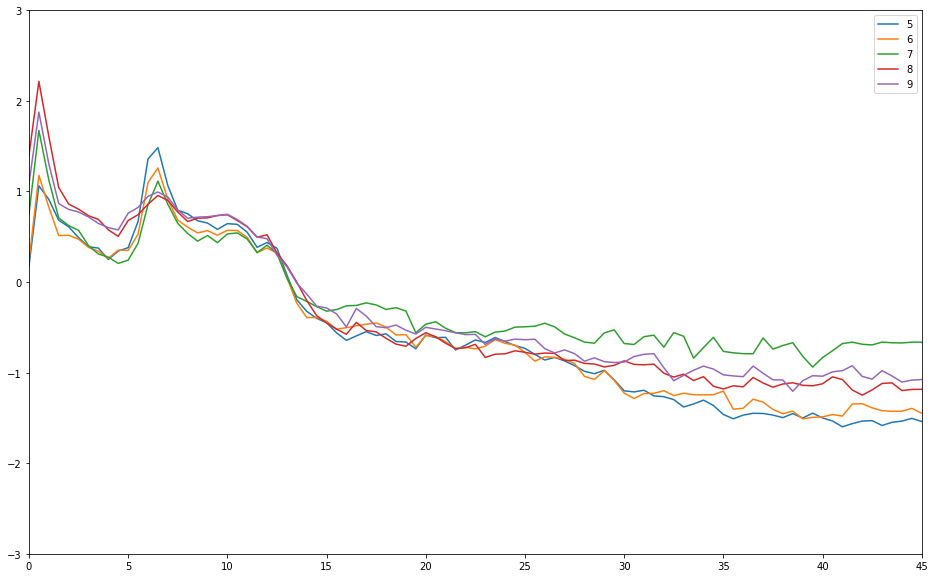

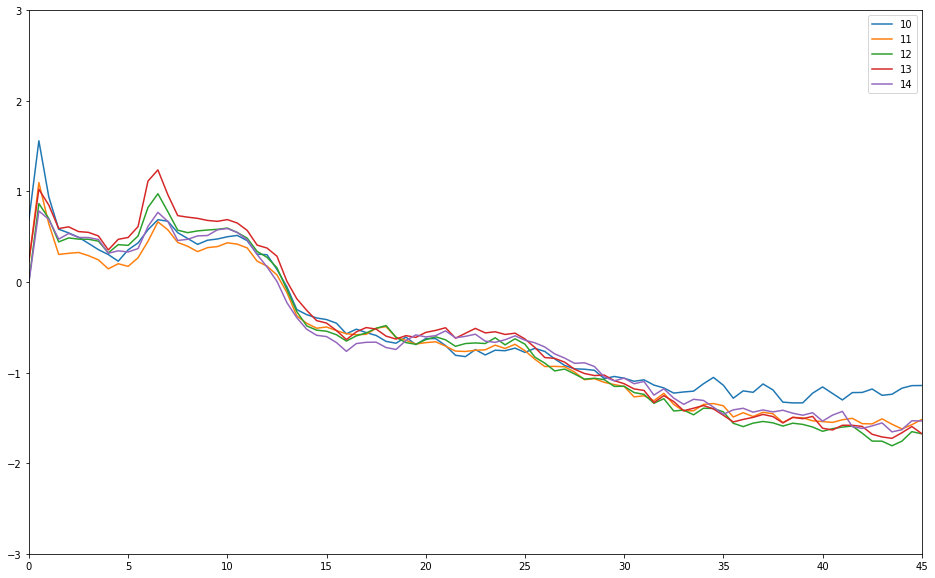

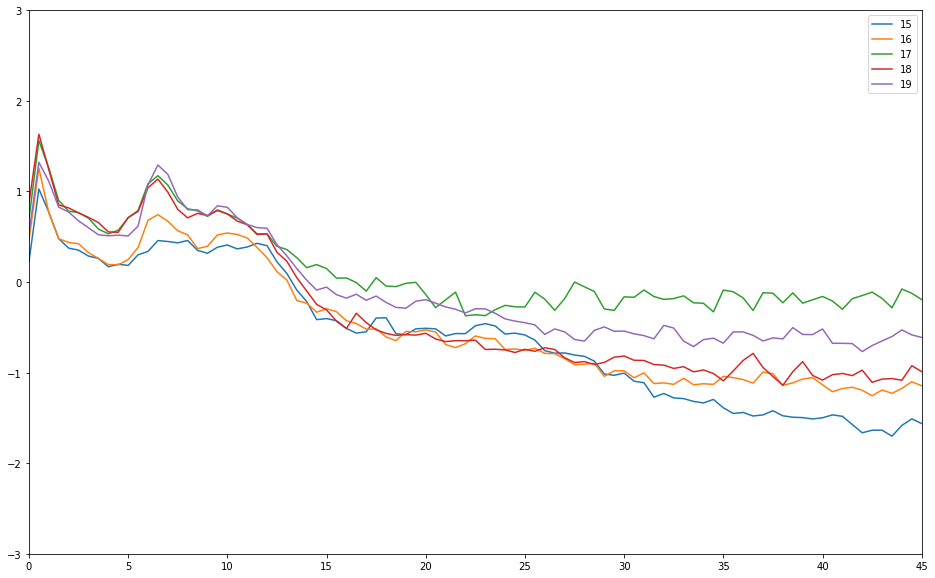

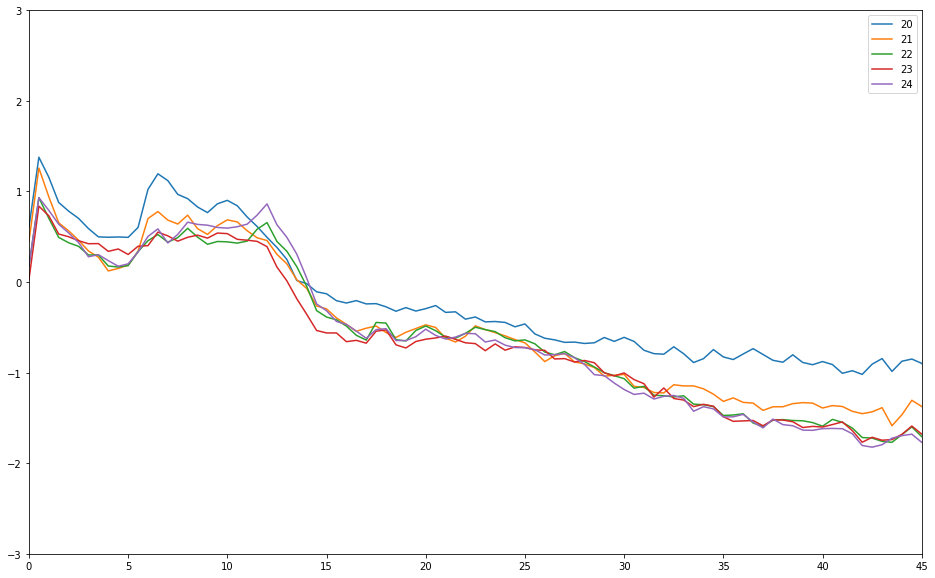

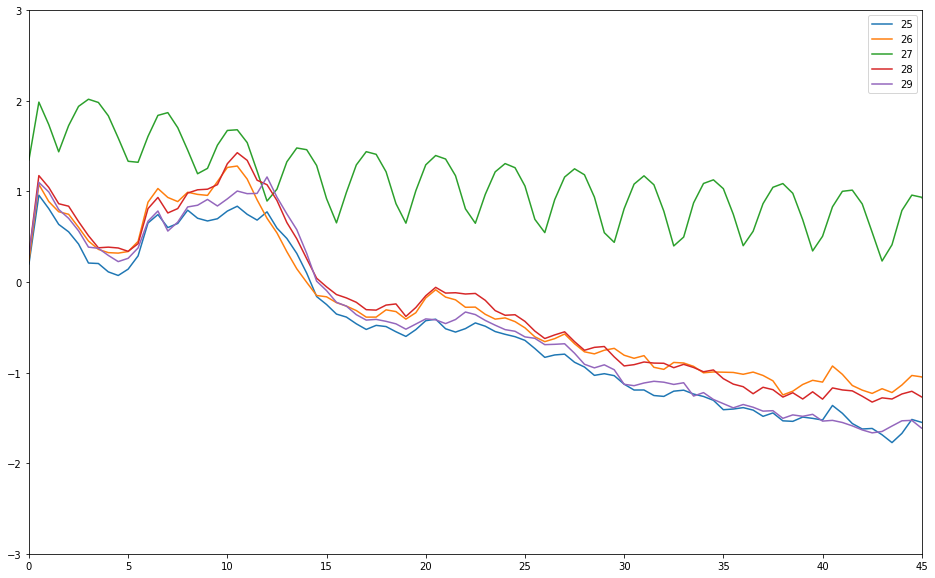

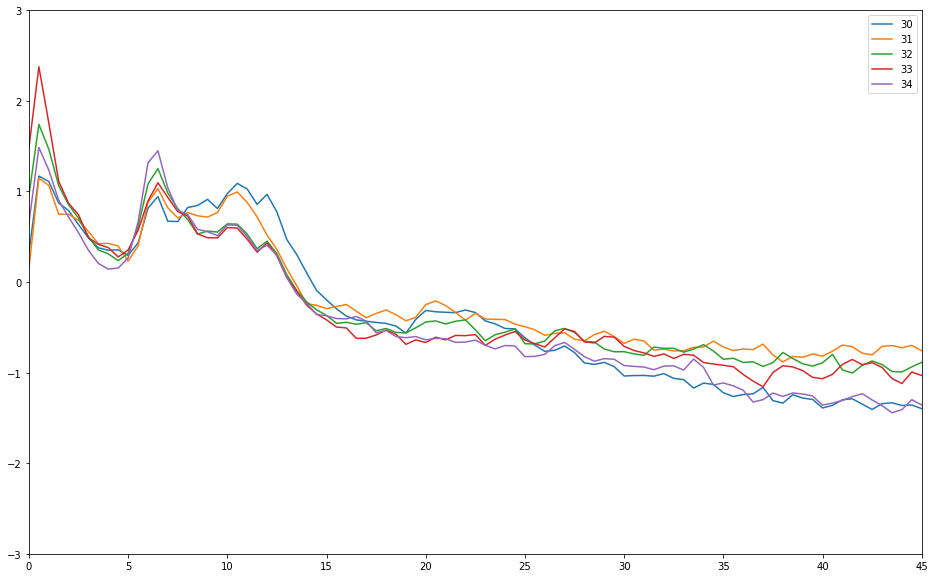

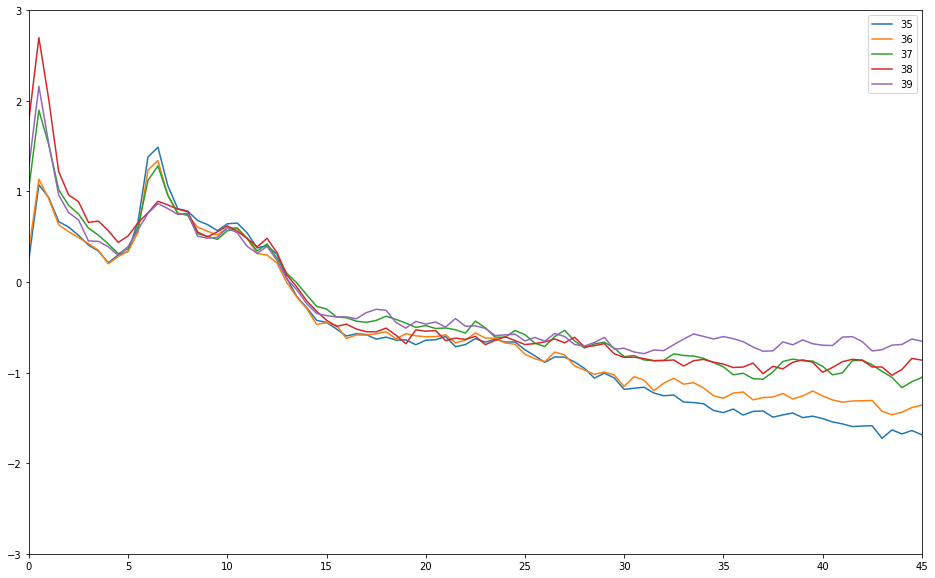

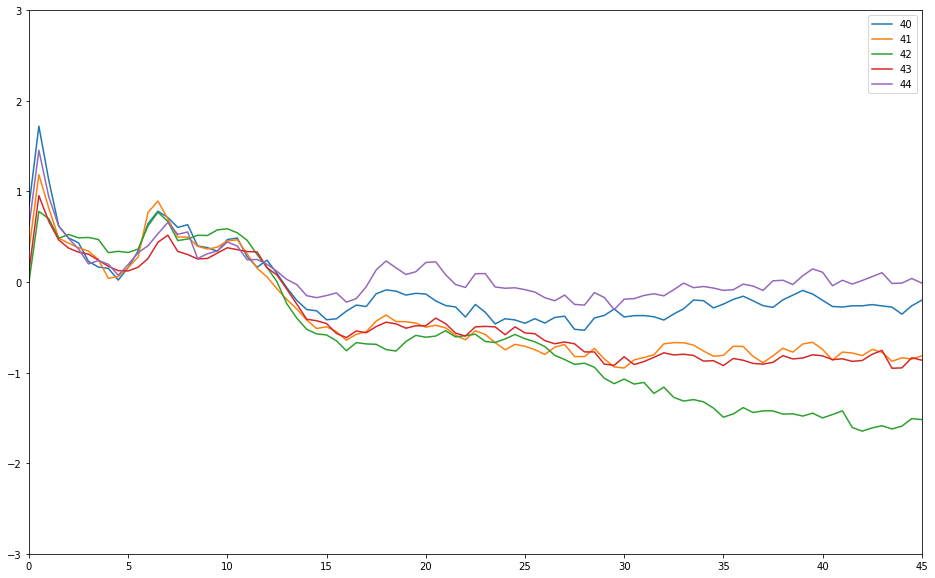

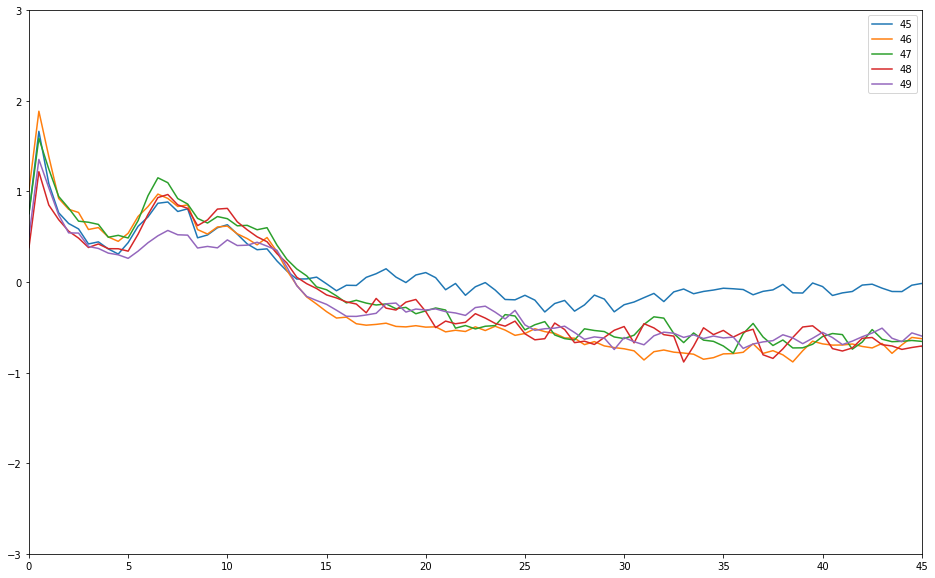

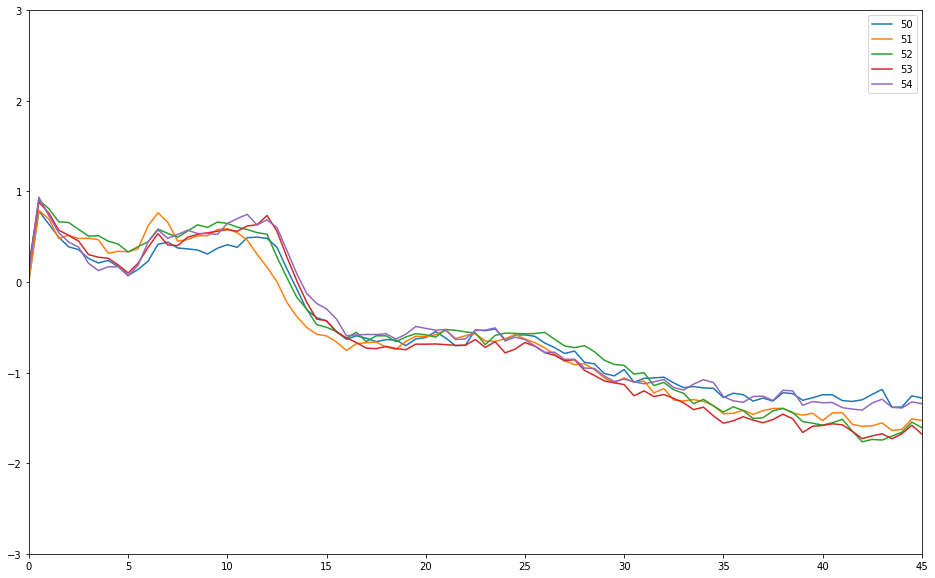

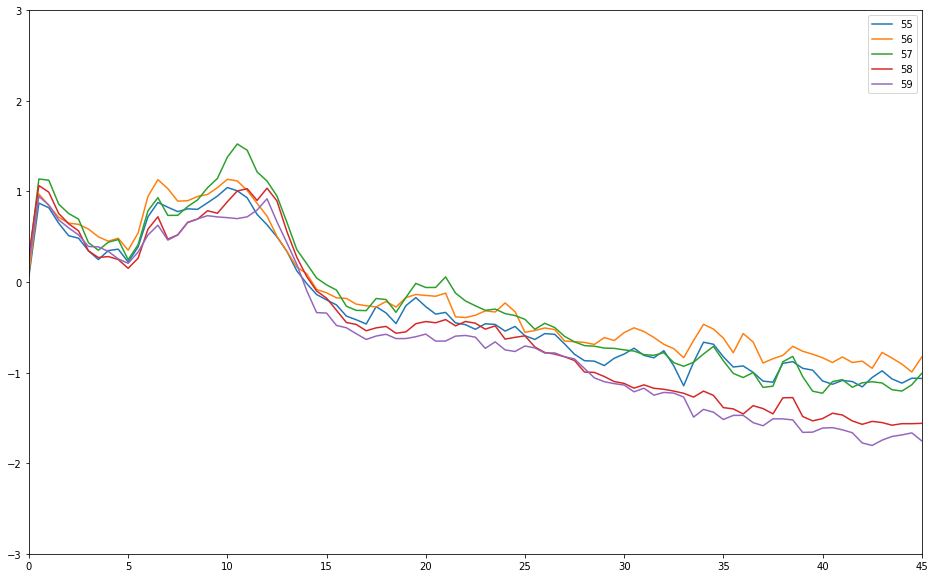

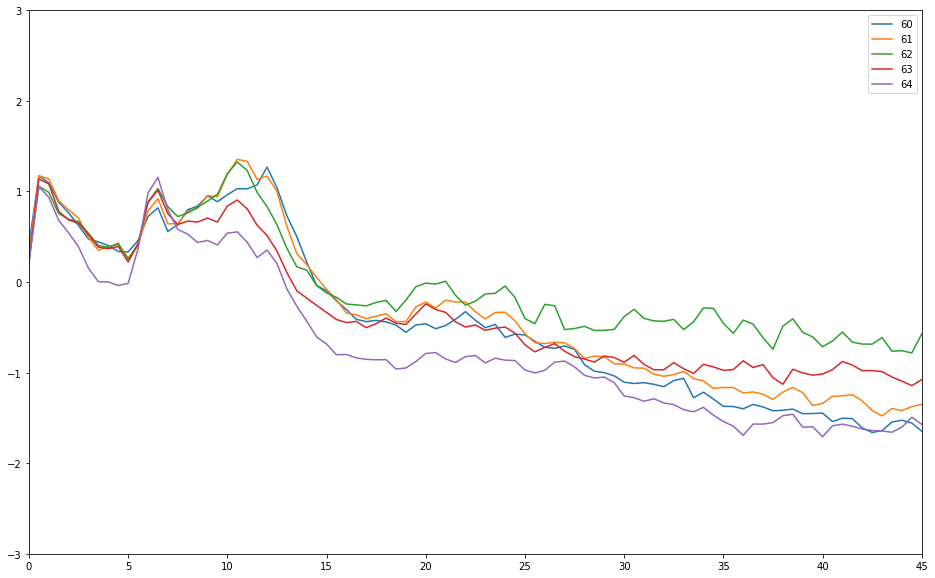

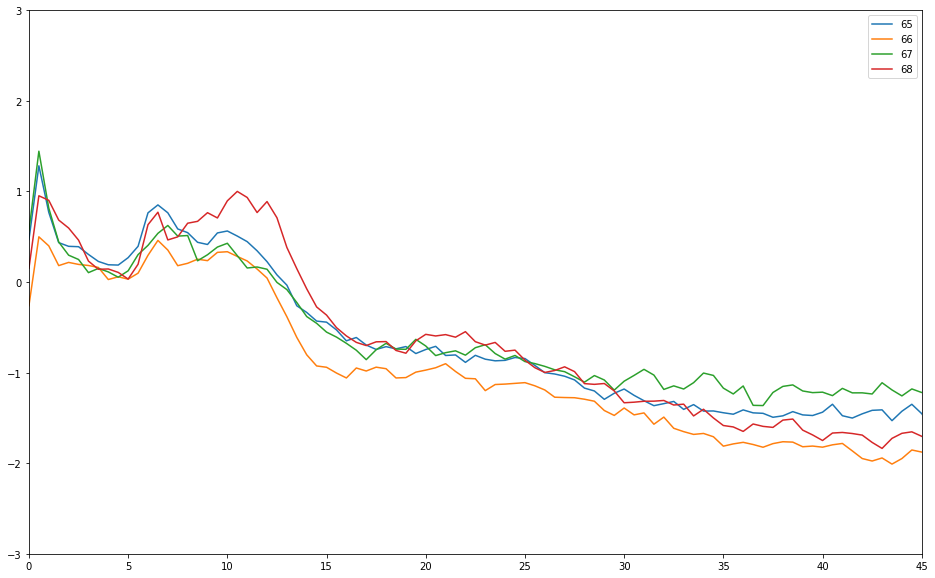

In [44]:
plt.figure(figsize=(16,10))
for ch in range(subj[idx].nbchan):
    if ch % 5 == 0:
        plt.figure(figsize=(16,10))
    plt.plot(subj[0].f, np.log10(subj[idx].psds[ch]['eyesc']), label=ch)
    plt.legend()
    plt.xlim([0, 45])
    plt.ylim([-3, 3])
    
# plt.legend()
# plt.xlim([0, 45])

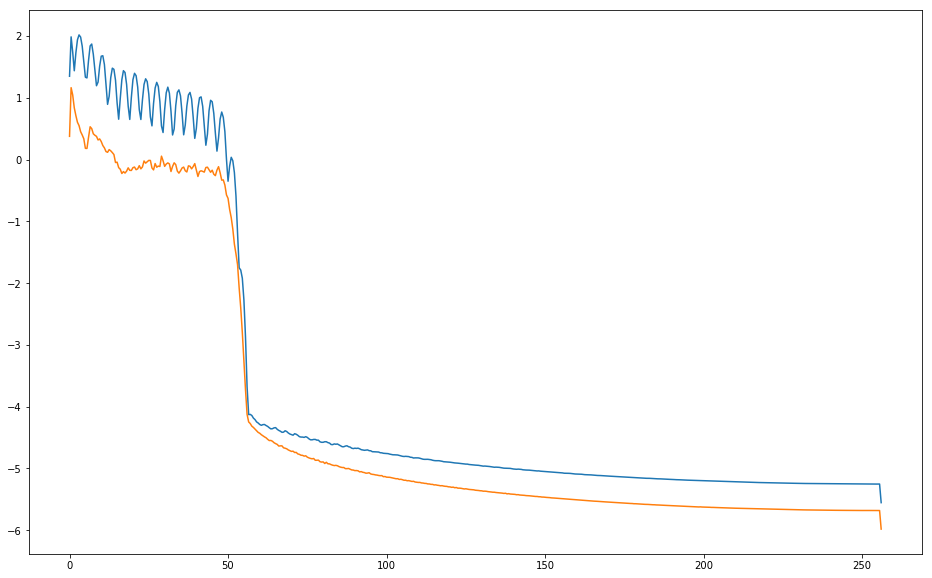

In [45]:
# Looks like it's 27:
plt.figure(figsize=(16,10))
plt.plot(subj[0].f, np.log10(subj[idx].psds[27]['eyesc']))
plt.plot(subj[0].f, np.log10(subj[idx].psds[27]['eyeso']))

## 112118578